In [1]:
%env CUDA_VISIBLE_DEVICES=2

env: CUDA_VISIBLE_DEVICES=2


In [2]:
import tensorflow as tf
import os 
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
file_names = glob.glob('../data/test/*/*.png')
file_tensors = tf.train.match_filenames_once('../data/test/*/*.png')
file_queue = tf.train.string_input_producer(file_tensors)
image_reader = tf.WholeFileReader()
_,image_files = image_reader.read(file_queue)

In [4]:
image = tf.image.decode_png(image_files)



In [5]:
sess = tf.Session()
init_op = tf.group(tf.global_variables_initializer(),tf.local_variables_initializer())
sess.run(init_op)
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(coord=coord, sess=sess)
print('the image is ',sess.run(image).shape)
coord.request_stop()
coord.join(threads)
image_label = b'\x01'

the image is  (29, 23, 3)


38 43 3


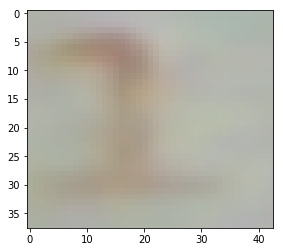

In [6]:
image_loaded = sess.run(image)
image_bytes = image_loaded.tobytes()
h,w,c = image_loaded.shape
print(h,w,c)
plt.imshow(image_loaded[:,:,::-1])

In [7]:
writer = tf.python_io.TFRecordWriter('../data/tfrecords/test_one_image.tfrecord')
example = tf.train.Example(features=tf.train.Features(feature={
    'label':tf.train.Feature(bytes_list = tf.train.BytesList(value=[image_label])),
    'image':tf.train.Feature(bytes_list = tf.train.BytesList(value=[image_bytes]))
}))

In [8]:
writer.write(example.SerializePartialToString())
writer.close()

In [9]:
tf_record_file_name = '../data/tfrecords/test_one_image.tfrecord'
tf_record_filename_queue = tf.train.string_input_producer([tf_record_file_name])
tf_record_reader = tf.TFRecordReader()
_,tf_record_serialized = tf_record_reader.read(tf_record_filename_queue)
tf_record_features = tf.parse_single_example(
    tf_record_serialized,
    features={
        'label':tf.FixedLenFeature([],tf.string),
        'image':tf.FixedLenFeature([],tf.string),
    })



In [ ]:
tf_record_image = tf.decode_raw(tf_record_features['image'],tf.uint8)
tf_record_image = tf.reshape(
    tf_record_image,[h,w,c])
sess.close()

sess = tf.InteractiveSession()
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
sess.run(init_op)
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(coord=coord, sess=sess)

In [ ]:
image_tfloaded = sess.run(tf_record_image)

In [ ]:
print(image_tfloaded.shape)
plt.imshow(image_tfloaded[:,:,::-1])

In [ ]:
s = np.array('s',np.str)
s.tobytes()